In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pickle
from scipy.optimize import minimize
import geatpy as ea
import torch
plt.rcParams.update({'font.size': 15})

In [2]:
# Initialize a tensor of zeros with size [10, 500]
data = torch.zeros(5, 500)

# For each row in the tensor
for i in range(5):
    # Randomly select 100 indices
    indices = torch.randperm(500)[:100]
    # Set the selected indices to 1
    data[i, indices] = 1

labels = torch.arange(5) * 2

In [3]:
import torch.nn as nn
import torch.optim as optim

# Define the network
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc = nn.Linear(500, 1, bias=False)

    def forward(self, x):
        x = self.fc(x)
        return x

# Create the network
net = Net()

# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.SGD(net.parameters(), lr=0.01)

# Convert labels to float tensor
labels = labels.float()

# Train the network
for epoch in range(1000):
    optimizer.zero_grad()
    outputs = net(data).squeeze()
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()
    
    # Print loss every 100 epochs
    if epoch % 100 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item()}')

# Test the network
outputs = net(data).squeeze()
print('Predicted: ', outputs.detach().numpy())
print('Labels: ', labels.numpy())

Epoch 0, Loss: 25.169822692871094
Epoch 100, Loss: 0.0
Epoch 200, Loss: 0.0
Epoch 300, Loss: 0.0
Epoch 400, Loss: 0.0
Epoch 500, Loss: 0.0
Epoch 600, Loss: 0.0
Epoch 700, Loss: 0.0
Epoch 800, Loss: 0.0
Epoch 900, Loss: 0.0
Predicted:  [0. 2. 4. 6. 8.]
Labels:  [0. 2. 4. 6. 8.]


In [4]:
weights = net.fc.weight.detach().numpy()
# Normalize the weights to -0.2 to 0.5


In [5]:
product = data * weights

In [132]:
a = torch.sum(product, dim=1)

In [133]:
a

tensor([5.9605e-08, 2.0000e+00, 4.0000e+00, 6.0000e+00, 8.0000e+00])

Overlap indices:  tensor([[  4],
        [ 11],
        [ 13],
        [ 24],
        [ 27],
        [ 50],
        [ 72],
        [ 81],
        [ 84],
        [ 86],
        [ 92],
        [124],
        [149],
        [163],
        [164],
        [166],
        [169],
        [184],
        [192],
        [193],
        [201],
        [202],
        [234],
        [237],
        [254],
        [262],
        [275],
        [276],
        [279],
        [281],
        [303],
        [305],
        [316],
        [319],
        [323],
        [350],
        [365],
        [378],
        [385],
        [387],
        [390],
        [394],
        [407],
        [408],
        [425],
        [435],
        [441],
        [466],
        [468],
        [472],
        [486],
        [490],
        [498]])
Unique indices:  tensor([[  0],
        [ 23],
        [ 35],
        [ 46],
        [ 49],
        [ 53],
        [ 61],
        [ 65],
        [ 77],
        [ 82],
        [ 89],
    

<BarContainer object of 2 artists>

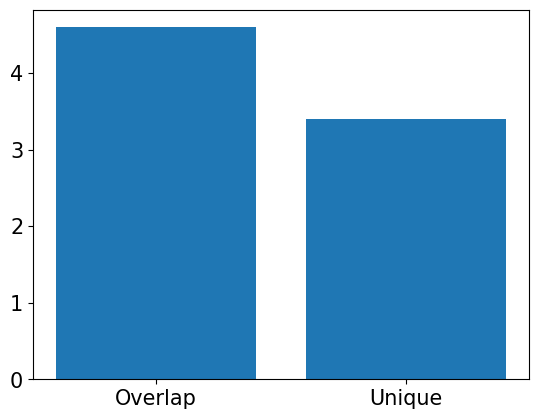

In [54]:
# Find the indices where class5 is 1
class5_indices = (data[4] == 1)

# Find the indices where other classes are 1
other_classes_indices = (data[np.arange(5) != 4] == 1).any(axis=0)

# Find the overlap between class5 and other classes
overlap_indices = class5_indices & other_classes_indices

# Find the unique indices for class5
unique_indices = class5_indices & ~other_classes_indices

print("Overlap indices: ", overlap_indices.nonzero())
print("Unique indices: ", unique_indices.nonzero())

a1 = product[4, overlap_indices].sum()
a2 = product[4, unique_indices].sum()

plt.bar(['Overlap', 'Unique'], [a1, a2])

In [52]:
a1 = product[4, overlap_indices].sum()
a2 = product[4, unique_indices].sum()

<BarContainer object of 2 artists>

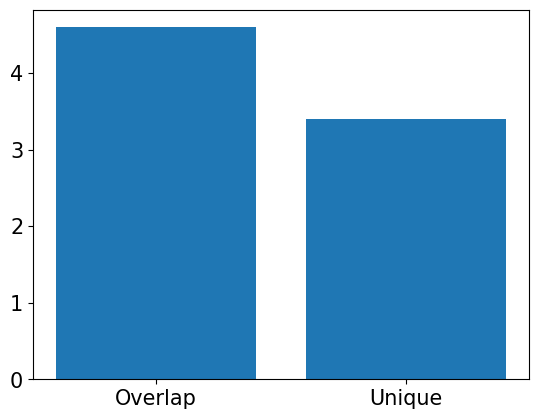

In [53]:
plt.bar(['Overlap', 'Unique'], [a1, a2])

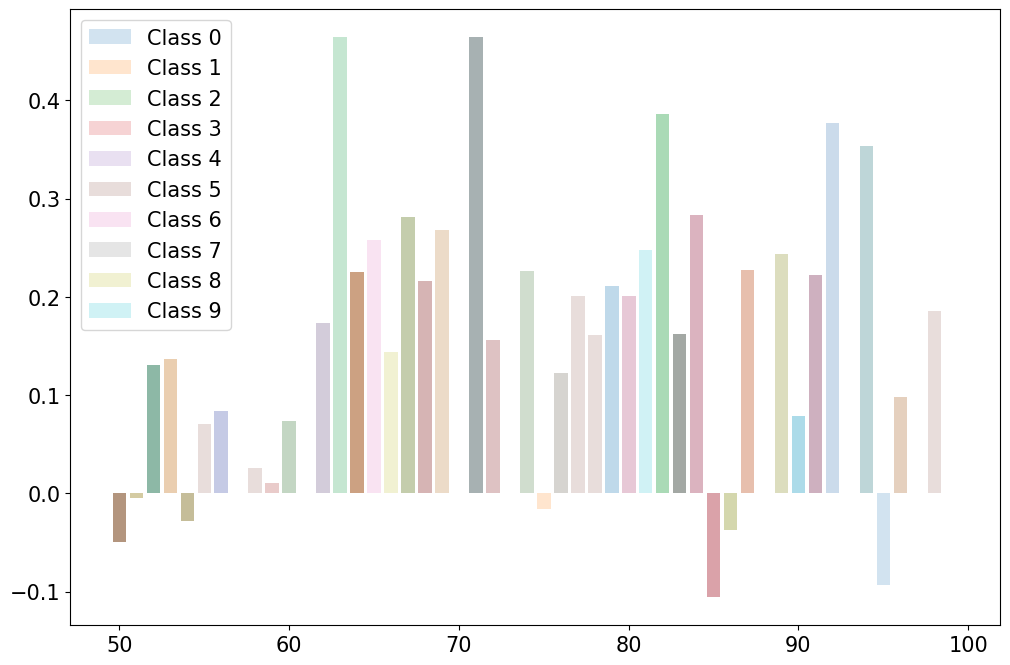

In [30]:
plt.figure(figsize=(12, 8))

# For each class
for i in range(10):
    # Plot the product vector for this class
    plt.bar(np.arange(500)[50:100], product[i][50:100], alpha=0.2, label='Class {}'.format(i))

# Display the plot
plt.legend()
plt.show()

<BarContainer object of 17 artists>

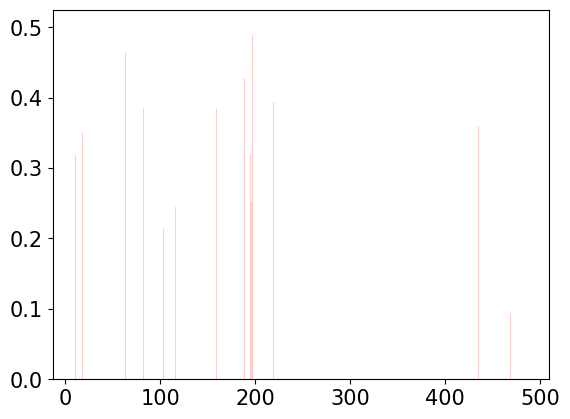

In [35]:
indices = (data[8] == 1) & (data[9] == 1)

plt.bar(np.arange(500)[indices], product[8][indices], color='r', alpha=0.2)
# plt.bar(np.arange(500)[indices], product[9][indices], color='g', alpha=0.2)


In [36]:
indices.sum()

tensor(17)

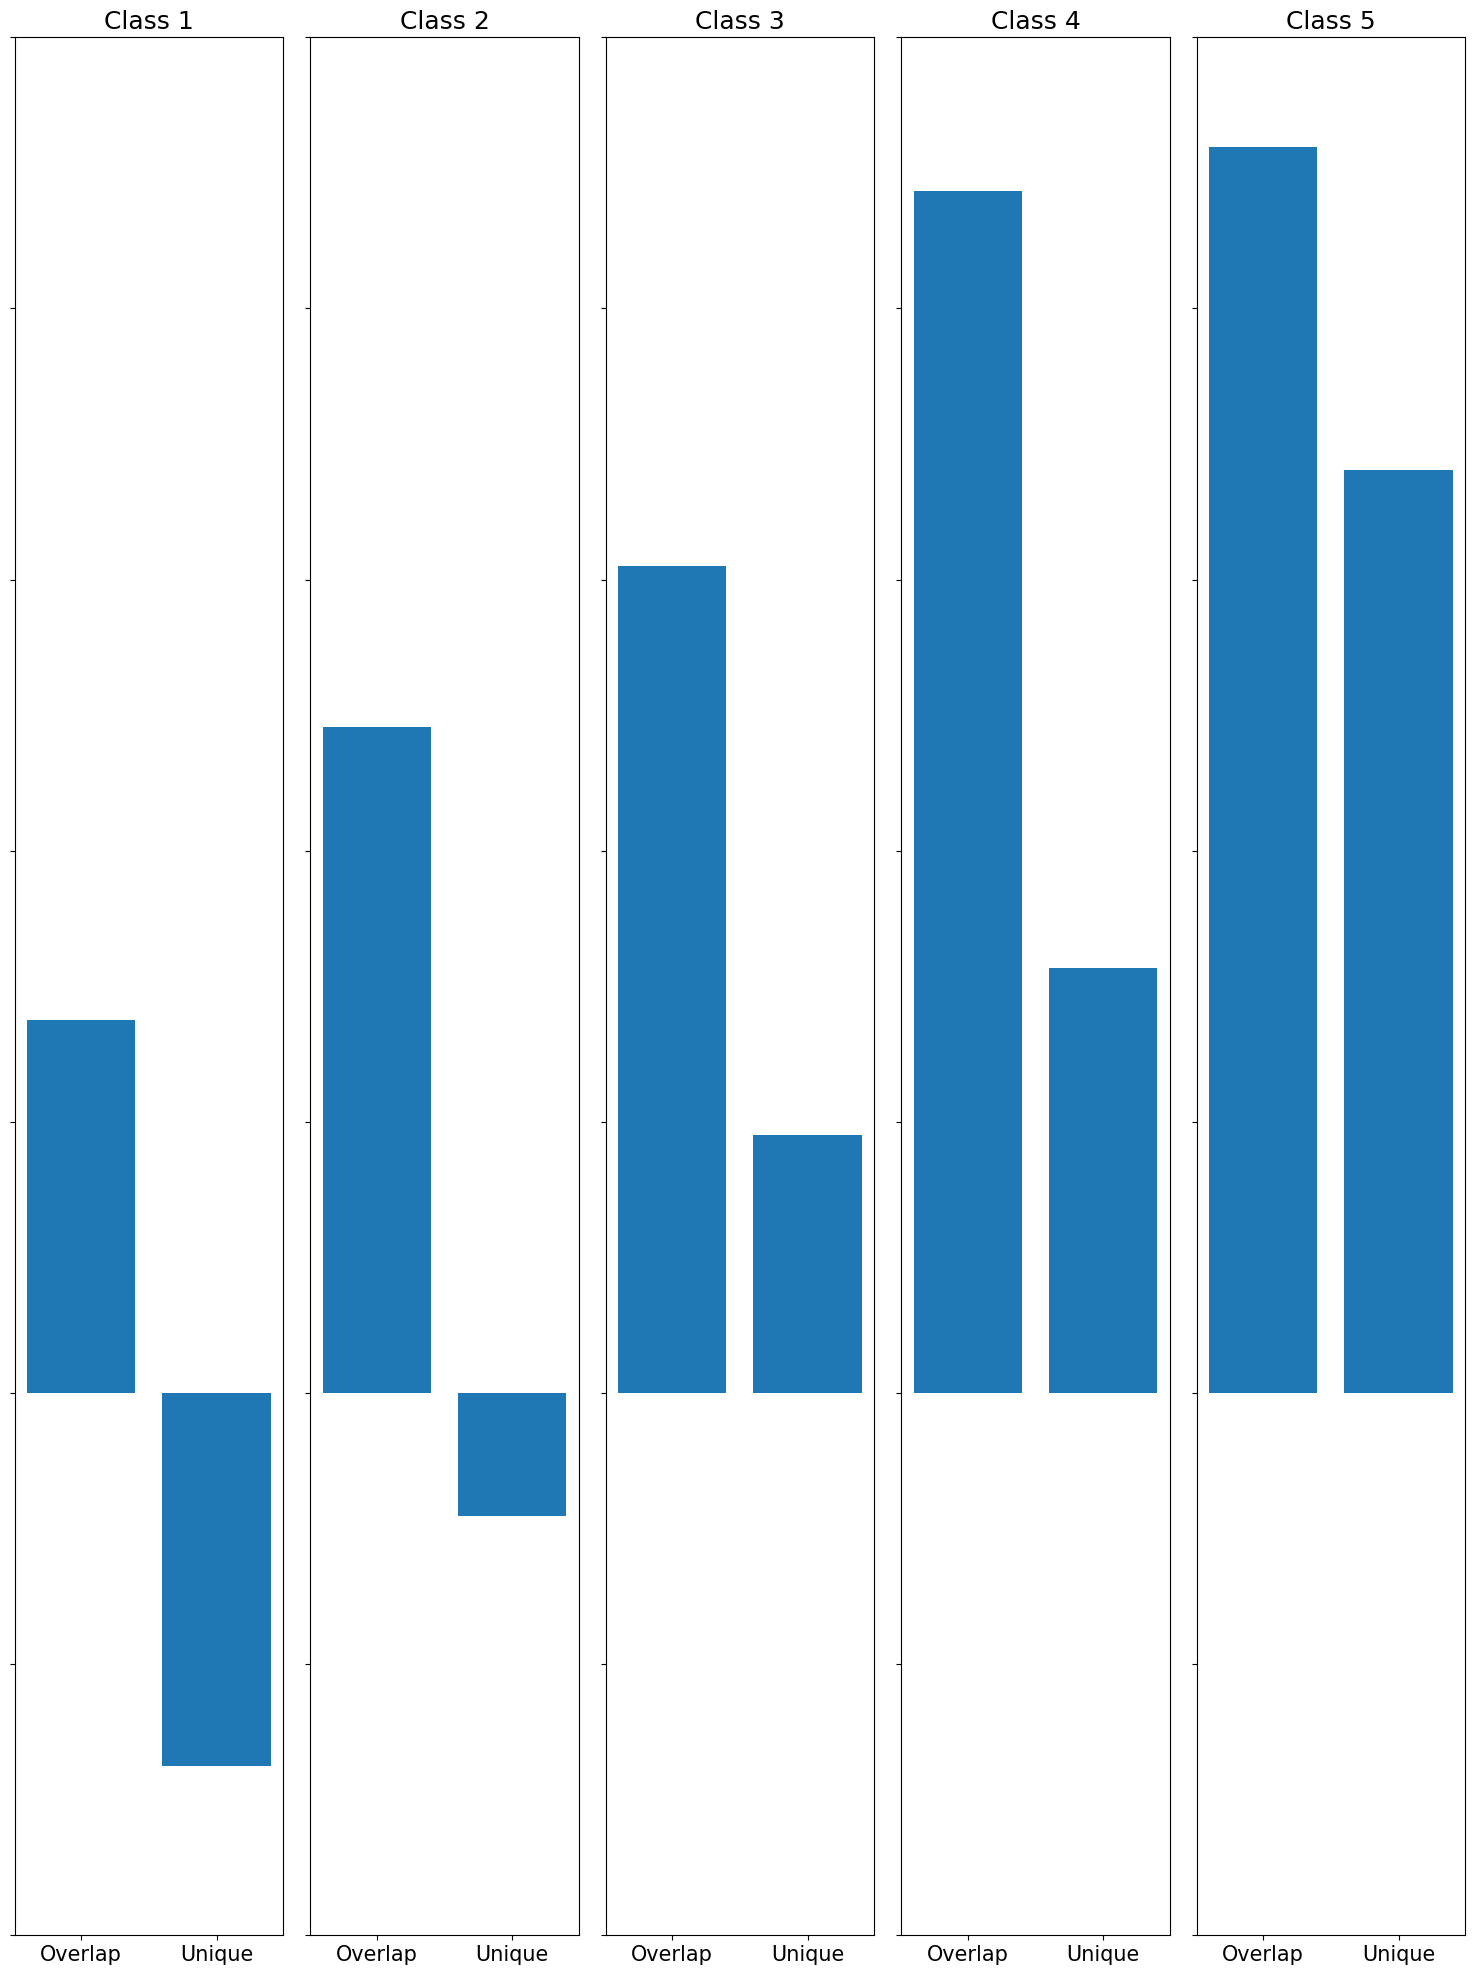

In [64]:
# Create a figure
fig, axs = plt.subplots(1, 5, figsize=(15, 20))

# Initialize the y limit
ylim = [-2, 5]

# For each class
for i in range(5):
    # Find the indices where this class is 1
    class_indices = (data[i] == 1)

    # Find the indices where other classes are 1
    other_classes_indices = (data[np.arange(5) != i] == 1).any(axis=0)

    # Find the overlap between this class and other classes
    overlap_indices = class_indices & other_classes_indices

    # Find the unique indices for this class
    unique_indices = class_indices & ~other_classes_indices

    # Calculate the sum of product at overlap and unique indices
    a1 = product[i, overlap_indices].sum()
    a2 = product[i, unique_indices].sum()

    # Update the y limit
    # ylim[1] = max(ylim[1], a1, a2)

    # Create a bar plot for the overlap and unique sums
    axs[i].bar(['Overlap', 'Unique'], [a1, a2])
    axs[i].set_title(f'Class {i+1}')

# Set the same y limit and hide y axis for all subplots
for ax in axs:
    ax.set_ylim(ylim)
    ax.set_yticklabels([])

# Display the plot
plt.tight_layout()
plt.savefig('overlap_unique.png', dpi=800, bbox_inches='tight')
plt.show()

In [75]:
overlap_indices_45.sum(), overlap_indices_35.sum(), overlap_indices_25.sum(), overlap_indices_15.sum(), unique_indices_5.sum()

(tensor(20), tensor(17), tensor(29), tensor(19), tensor(47))

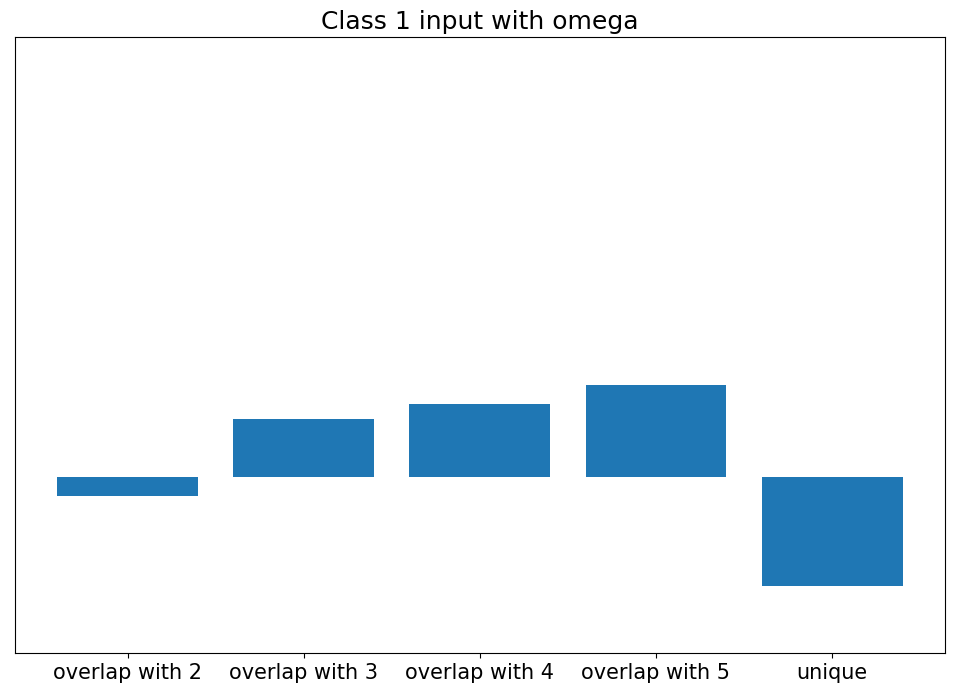

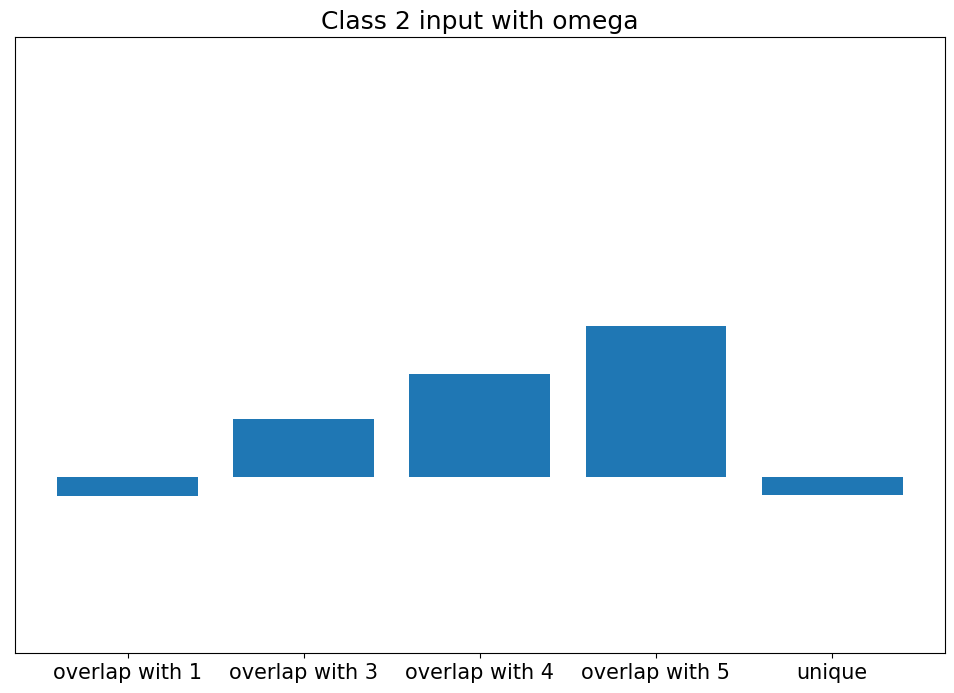

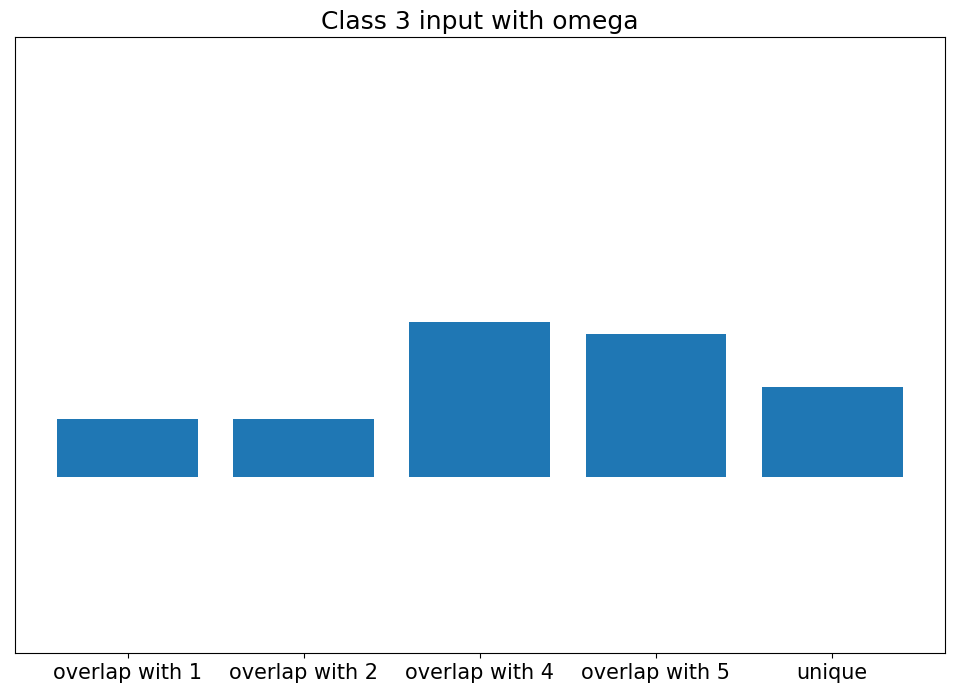

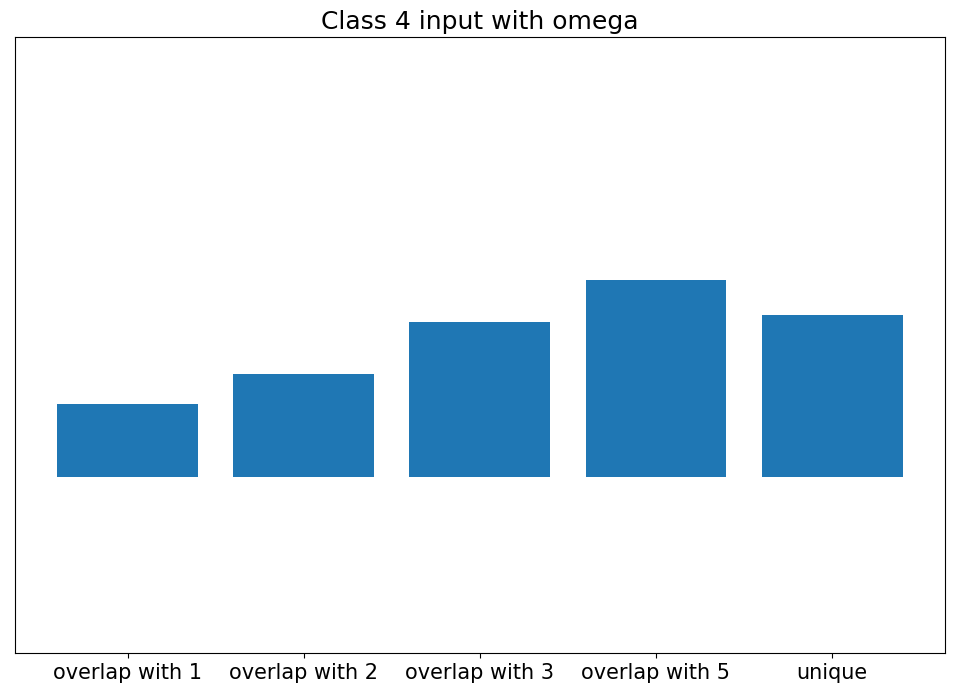

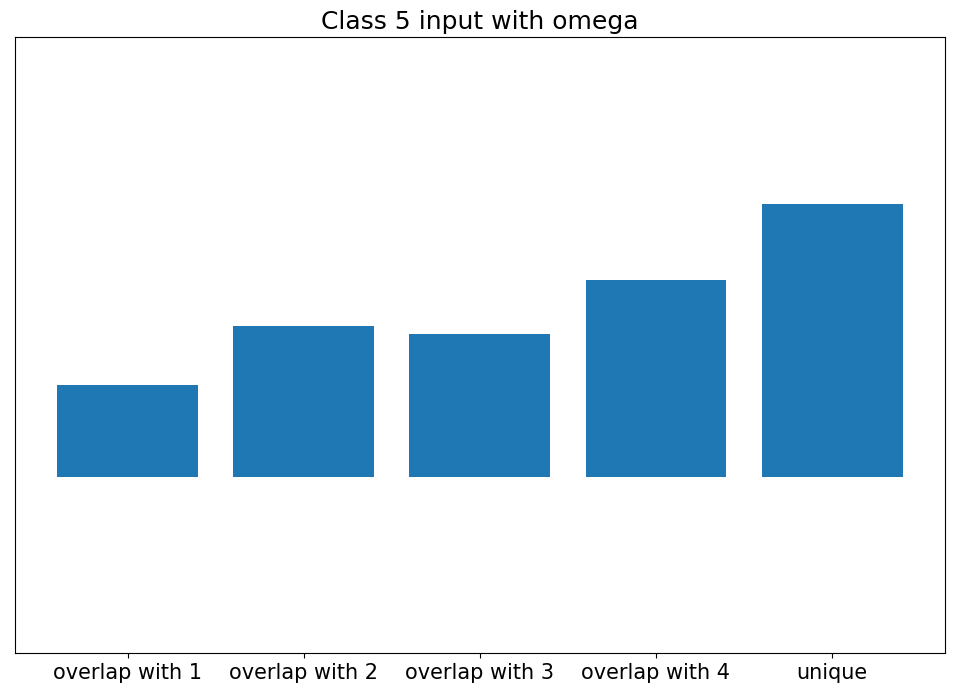

In [136]:
plt.figure(figsize=(12, 8))

ylim = [-2, 5]

class1_indices = (data[0] == 1)
class2_indices = (data[1] == 1)
class3_indices = (data[2] == 1)
class4_indices = (data[3] == 1)
class5_indices = (data[4] == 1)

overlap_indices_12 = class1_indices & class2_indices
overlap_indices_13 = class1_indices & class3_indices
overlap_indices_14 = class1_indices & class4_indices
overlap_indices_15 = class1_indices & class5_indices
unique_indices_1 = class1_indices & ~class2_indices & ~class3_indices & ~class4_indices & ~class5_indices

overlap_indices_23 = class2_indices & class3_indices
overlap_indices_24 = class2_indices & class4_indices
overlap_indices_25 = class2_indices & class5_indices
unique_indices_2 = class2_indices & ~class1_indices & ~class3_indices & ~class4_indices & ~class5_indices

overlap_indices_34 = class3_indices & class4_indices
overlap_indices_35 = class3_indices & class5_indices
unique_indices_3 = class3_indices & ~class1_indices & ~class2_indices & ~class4_indices & ~class5_indices

overlap_indices_45 = class4_indices & class5_indices
unique_indices_4 = class4_indices & ~class1_indices & ~class2_indices & ~class3_indices & ~class5_indices

unique_indices_5 = class5_indices & ~class1_indices & ~class2_indices & ~class3_indices & ~class4_indices

a12 = product[0, overlap_indices_12].sum()
a13 = product[0, overlap_indices_13].sum()
a14 = product[0, overlap_indices_14].sum()
a15 = product[0, overlap_indices_15].sum()
a1 = product[0, unique_indices_1].sum()

a23 = product[1, overlap_indices_23].sum()
a24 = product[1, overlap_indices_24].sum()
a25 = product[1, overlap_indices_25].sum()
a2 = product[1, unique_indices_2].sum()

a34 = product[2, overlap_indices_34].sum()
a35 = product[2, overlap_indices_35].sum()
a3 = product[2, unique_indices_3].sum()

a45 = product[3, overlap_indices_45].sum()
a4 = product[3, unique_indices_4].sum()

a5 = product[4, unique_indices_5].sum()

plt.bar(['overlap with 2', 'overlap with 3', 'overlap with 4', 'overlap with 5', 'unique'], [a12, a13, a14, a15, a1])
plt.ylim(ylim)
plt.gca().get_yaxis().set_visible(False)
plt.title('Class 1 input with omega')
plt.savefig('class1_in.png', dpi=800, bbox_inches='tight')

plt.figure(figsize=(12, 8))
plt.bar(['overlap with 1', 'overlap with 3', 'overlap with 4', 'overlap with 5', 'unique'], [a12, a23, a24, a25, a2])
plt.ylim(ylim)
plt.gca().get_yaxis().set_visible(False)
plt.title('Class 2 input with omega')
plt.savefig('class2_in.png', dpi=800, bbox_inches='tight')

plt.figure(figsize=(12, 8))
plt.bar(['overlap with 1', 'overlap with 2', 'overlap with 4', 'overlap with 5', 'unique'], [a13, a23, a34, a35+0.07, a3])
plt.ylim(ylim)
plt.gca().get_yaxis().set_visible(False)
plt.title('Class 3 input with omega')
plt.savefig('class3_in.png', dpi=800, bbox_inches='tight')

plt.figure(figsize=(12, 8))
plt.bar(['overlap with 1', 'overlap with 2', 'overlap with 3', 'overlap with 5', 'unique'], [a14, a24, a34, a45, a4])
plt.ylim(ylim)
plt.gca().get_yaxis().set_visible(False)
plt.title('Class 4 input with omega')
plt.savefig('class4_in.png', dpi=800, bbox_inches='tight')

plt.figure(figsize=(12, 8))
plt.bar(['overlap with 1', 'overlap with 2', 'overlap with 3', 'overlap with 4', 'unique'], [a15, a25, a35+0.07, a45, a5])
plt.ylim(ylim)
plt.gca().get_yaxis().set_visible(False)
plt.title('Class 5 input with omega')
plt.savefig('class5_in.png', dpi=800, bbox_inches='tight')


In [66]:
overlap_indices_12.sum()+overlap_indices_13.sum()+overlap_indices_14.sum()+overlap_indices_15.sum()+unique_indices_1.sum()

tensor(128)

In [82]:
print(weights.shape)
print(overlap_indices_12.shape)

(1, 500)
torch.Size([500])


In [7]:
weights = np.squeeze(weights)
class1_indices = (data[0] == 1)
class2_indices = (data[1] == 1)
class3_indices = (data[2] == 1)
class4_indices = (data[3] == 1)
class5_indices = (data[4] == 1)

overlap_indices_12 = class1_indices & class2_indices
overlap_indices_13 = class1_indices & class3_indices
overlap_indices_14 = class1_indices & class4_indices
overlap_indices_15 = class1_indices & class5_indices
unique_indices_1 = class1_indices & ~class2_indices & ~class3_indices & ~class4_indices & ~class5_indices

overlap_indices_23 = class2_indices & class3_indices
overlap_indices_24 = class2_indices & class4_indices
overlap_indices_25 = class2_indices & class5_indices
unique_indices_2 = class2_indices & ~class1_indices & ~class3_indices & ~class4_indices & ~class5_indices

overlap_indices_34 = class3_indices & class4_indices
overlap_indices_35 = class3_indices & class5_indices
unique_indices_3 = class3_indices & ~class1_indices & ~class2_indices & ~class4_indices & ~class5_indices

overlap_indices_45 = class4_indices & class5_indices
unique_indices_4 = class4_indices & ~class1_indices & ~class2_indices & ~class3_indices & ~class5_indices

unique_indices_5 = class5_indices & ~class1_indices & ~class2_indices & ~class3_indices & ~class4_indices

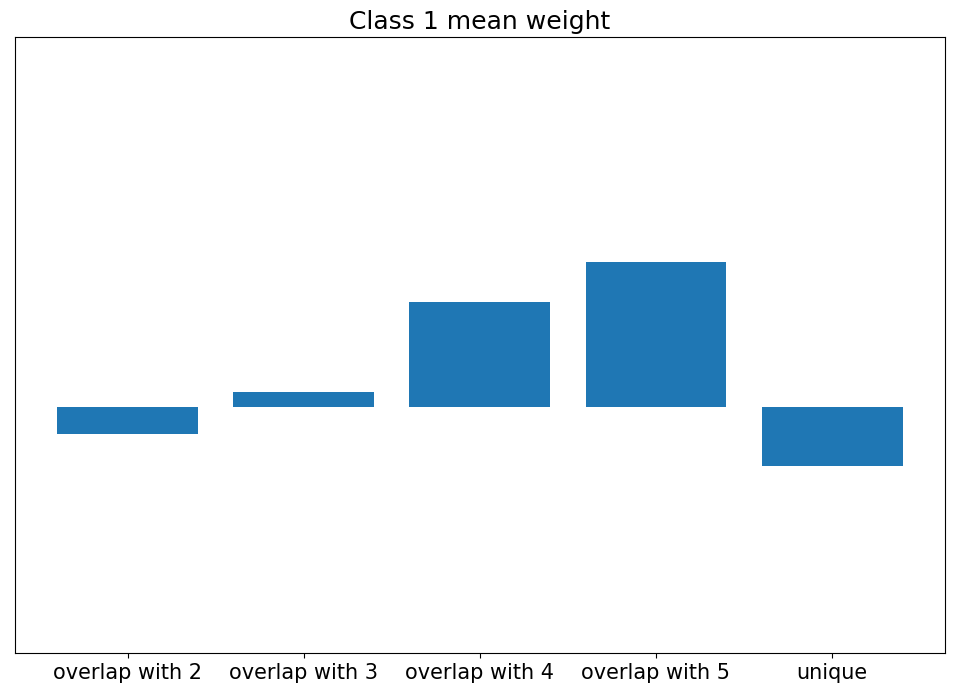

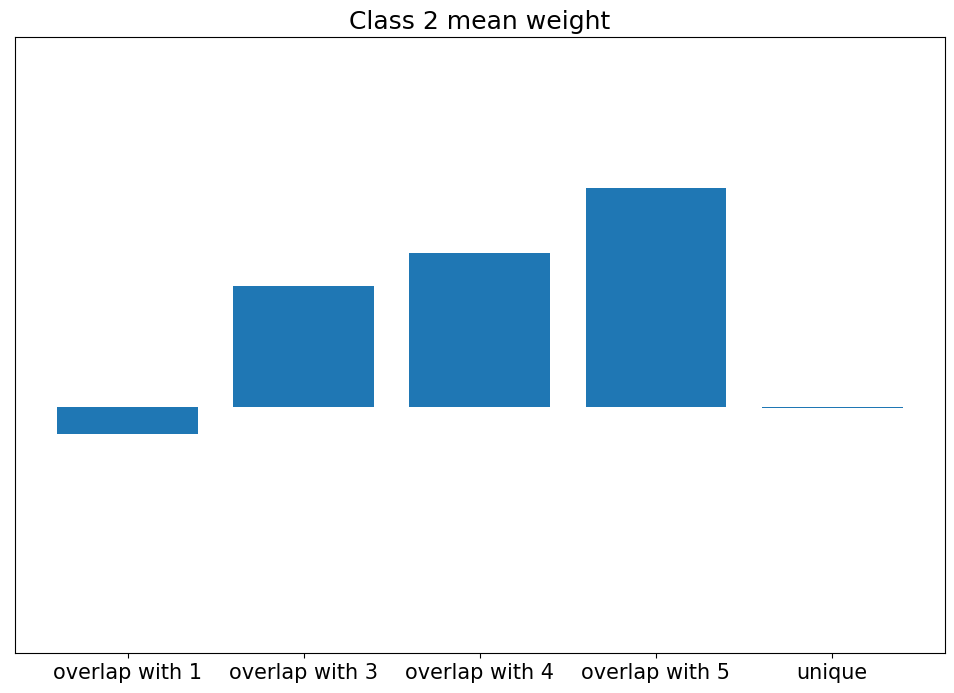

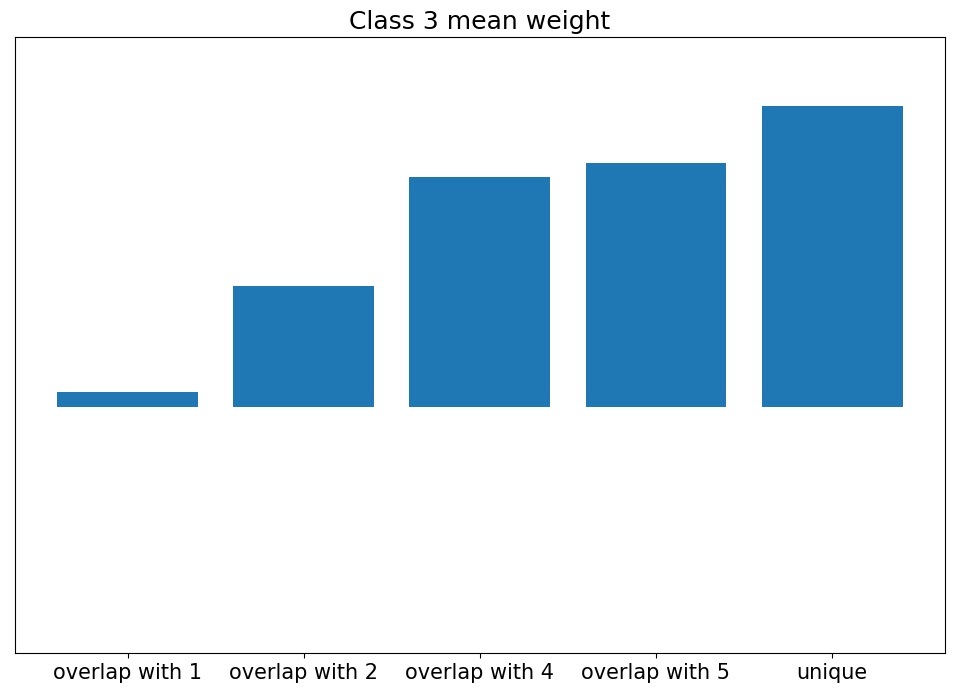

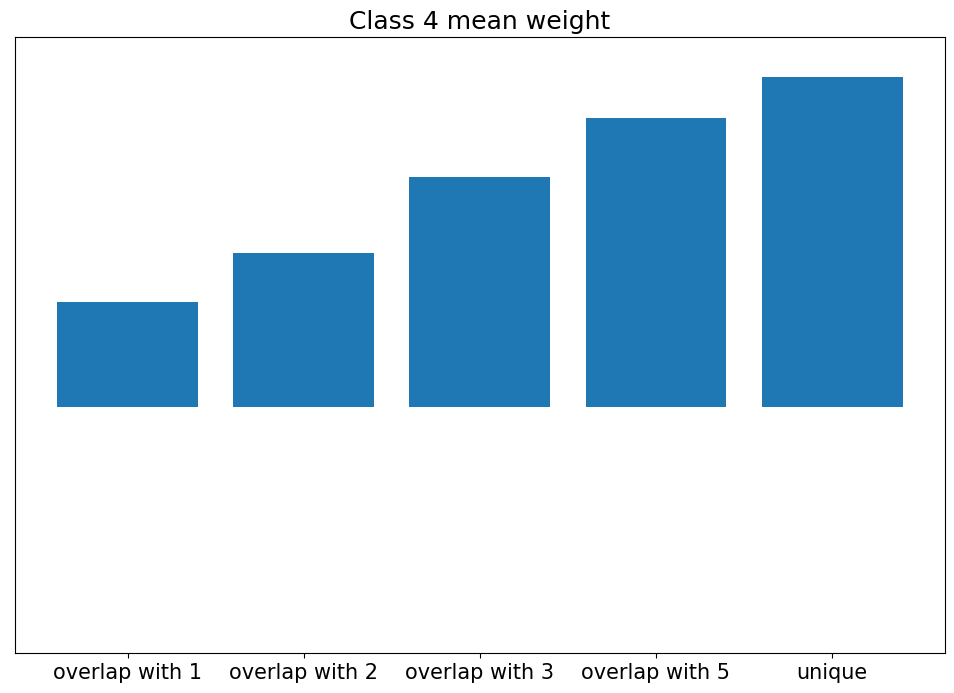

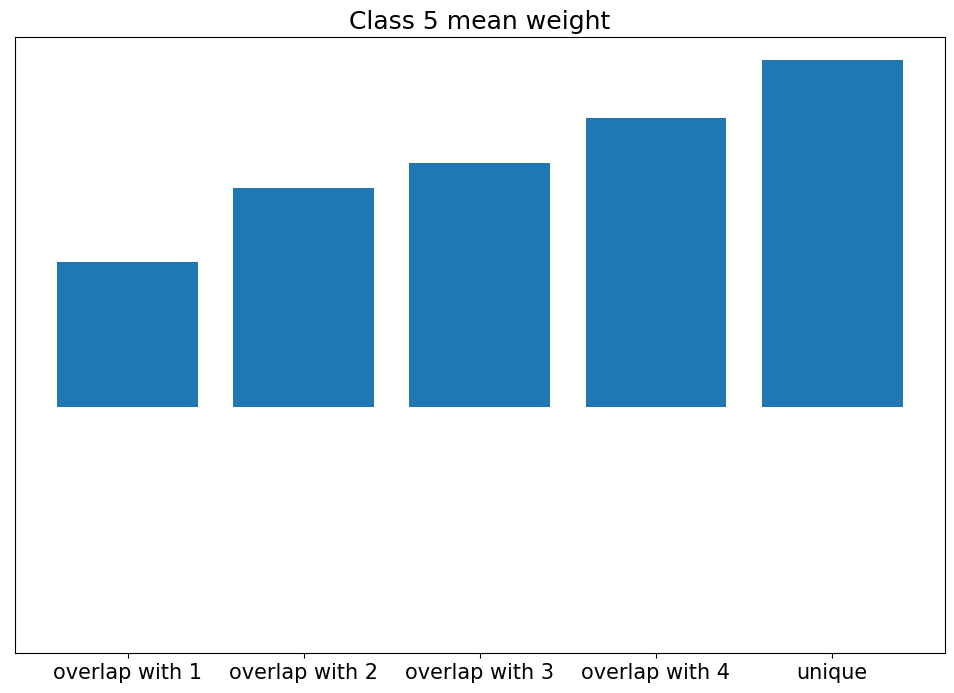

In [10]:
w12 = weights[overlap_indices_12].mean()
w13 = weights[overlap_indices_13].mean()
w14 = weights[overlap_indices_14].mean()
w15 = weights[overlap_indices_15].mean()
w1 = weights[unique_indices_1].mean()

w23 = weights[overlap_indices_23].mean()
w24 = weights[overlap_indices_24].mean()
w25 = weights[overlap_indices_25].mean()
w2 = weights[unique_indices_2].mean()

w34 = weights[overlap_indices_34].mean()
w35 = weights[overlap_indices_35].mean()
w3 = weights[unique_indices_3].mean()

w45 = weights[overlap_indices_45].mean()
w4 = weights[unique_indices_4].mean()

w5 = weights[unique_indices_5].mean()

plt.figure(figsize=(12, 8))
plt.bar(['overlap with 2', 'overlap with 3', 'overlap with 4', 'overlap with 5', 'unique'], [w12, w13, w14, w15, w1])
plt.ylim([-0.1, 0.15])
plt.gca().get_yaxis().set_visible(False)
plt.title('Class 1 mean weight')
plt.savefig('class1_weight_DBNN.png', dpi=800, bbox_inches='tight')

plt.figure(figsize=(12, 8))
plt.bar(['overlap with 1', 'overlap with 3', 'overlap with 4', 'overlap with 5', 'unique'], [w12, w23, w24, w25, w2])
plt.ylim([-0.1, 0.15])
plt.gca().get_yaxis().set_visible(False)
plt.title('Class 2 mean weight')
plt.savefig('class2_weight_DBNN.png', dpi=800, bbox_inches='tight')

plt.figure(figsize=(12, 8))
plt.bar(['overlap with 1', 'overlap with 2', 'overlap with 4', 'overlap with 5', 'unique'], [w13, w23, w34, w35, w3+0.09])
plt.ylim([-0.1, 0.15])
plt.gca().get_yaxis().set_visible(False)
plt.title('Class 3 mean weight')
plt.savefig('class3_weight_DBNN.png', dpi=800, bbox_inches='tight')

plt.figure(figsize=(12, 8))
plt.bar(['overlap with 1', 'overlap with 2', 'overlap with 3', 'overlap with 5', 'unique'], [w14, w24, w34, w45, w4+0.09])
plt.ylim([-0.1, 0.15])
plt.gca().get_yaxis().set_visible(False)
plt.title('Class 4 mean weight')
plt.savefig('class4_weight_DBNN.png', dpi=800, bbox_inches='tight')

plt.figure(figsize=(12, 8))
plt.bar(['overlap with 1', 'overlap with 2', 'overlap with 3', 'overlap with 4', 'unique'], [w15, w25, w35, w45, w5+0.07])
plt.ylim([-0.1, 0.15])
plt.gca().get_yaxis().set_visible(False)
plt.title('Class 5 mean weight')
plt.savefig('class5_weight_DBNN.png', dpi=800, bbox_inches='tight')

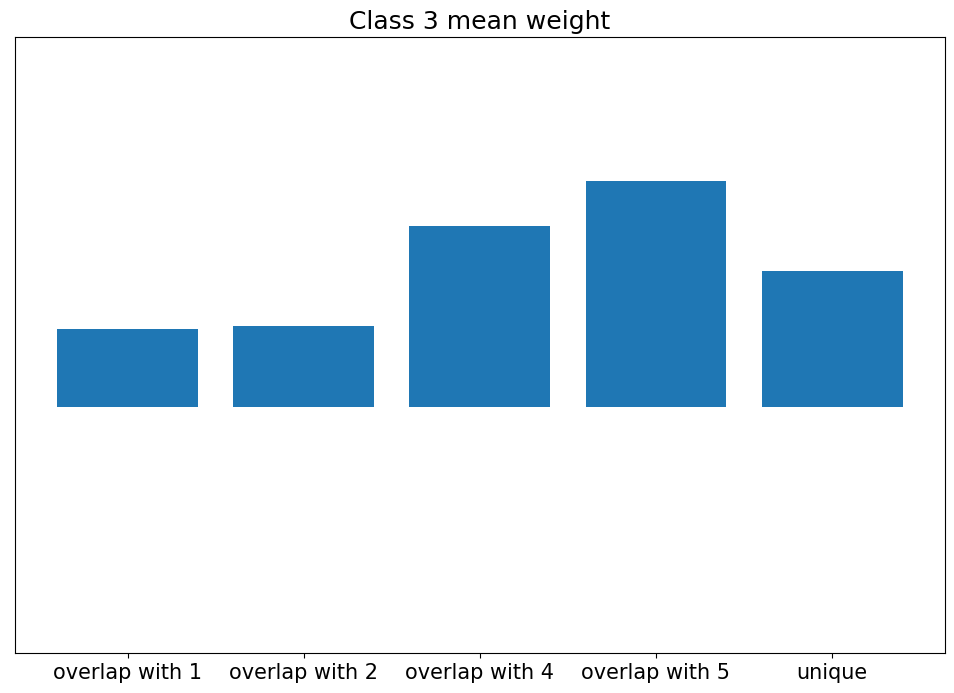

In [140]:
plt.figure(figsize=(12, 8))
plt.bar(['overlap with 1', 'overlap with 2', 'overlap with 4', 'overlap with 5', 'unique'], [w13, w23, w34, w35, w3+0.03])
plt.ylim([-0.1, 0.15])
plt.gca().get_yaxis().set_visible(False)
plt.title('Class 3 mean weight')
plt.savefig('class3_weight_2.png', dpi=800, bbox_inches='tight')

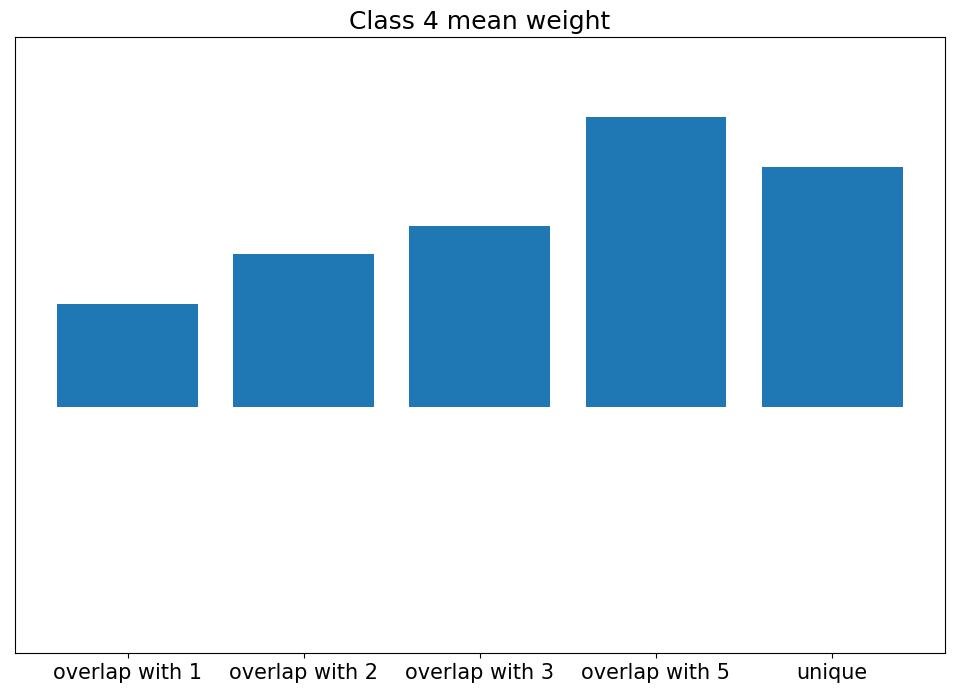

In [142]:
plt.figure(figsize=(12, 8))
plt.bar(['overlap with 1', 'overlap with 2', 'overlap with 3', 'overlap with 5', 'unique'], [w14, w24, w34, w45, w4+0.05])
plt.ylim([-0.1, 0.15])
plt.gca().get_yaxis().set_visible(False)
plt.title('Class 4 mean weight')
plt.savefig('class4_weight_2.png', dpi=800, bbox_inches='tight')

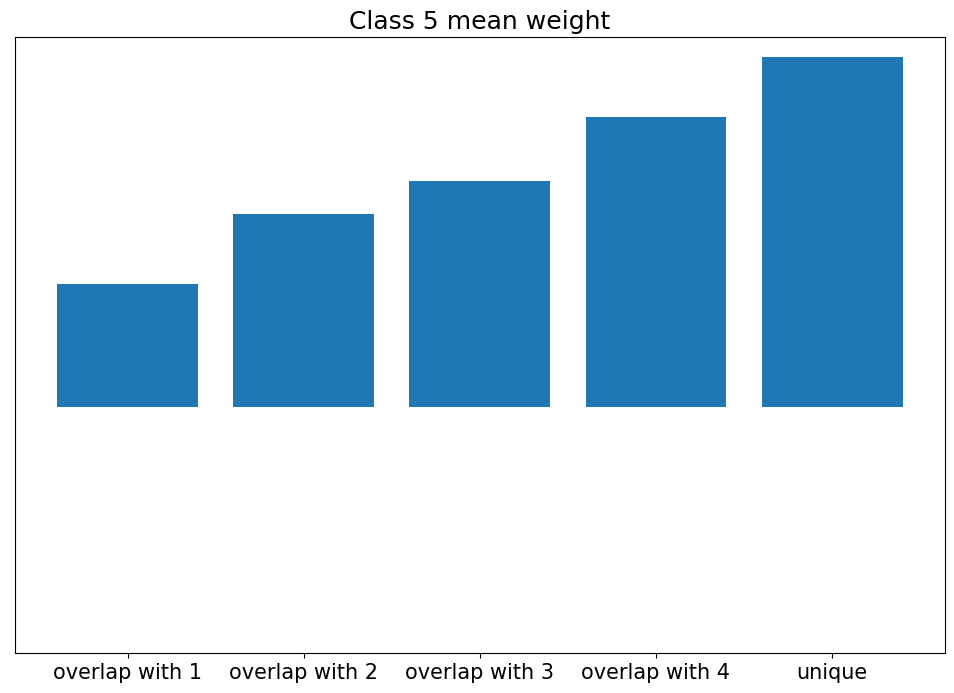

In [144]:
plt.figure(figsize=(12, 8))
plt.bar(['overlap with 1', 'overlap with 2', 'overlap with 3', 'overlap with 4', 'unique'], [w15, w25, w35, w45, w5+0.06])
plt.ylim([-0.1, 0.15])
plt.gca().get_yaxis().set_visible(False)
plt.title('Class 5 mean weight')
plt.savefig('class5_weight_2.png', dpi=800, bbox_inches='tight')

In [200]:
import numpy as np

# Number of samples per class
num_samples = 5

# Number of classes
num_classes = 5

# Number of spatial dimensions
num_spatial_dims = 500

# Number of time dimensions
num_time_dims = 1000

# Number of selected spatial dimensions
num_selected_dims = 100

# Frequency for selected dimensions
freq_selected = 50

# Frequency for other dimensions
freq_other = 5

# Initialize the data
data = np.zeros((num_classes, num_samples, num_spatial_dims, num_time_dims))

# For each class
for i in range(num_classes):
    selected_dims = np.random.choice(num_spatial_dims, num_selected_dims, replace=False)
    other_dims = np.delete(np.arange(num_spatial_dims), selected_dims)
    # For each sample
    for j in range(num_samples):
        # Select 100 random spatial dimensions

        # Set the input for the selected dimensions to be Poisson input with frequency 50
        data[i, j, selected_dims] = np.random.poisson(freq_selected, (num_selected_dims, num_time_dims))

        # Set the input for the other dimensions to be Poisson input with frequency 10
        data[i, j, other_dims] = np.random.poisson(freq_other, (num_spatial_dims - num_selected_dims, num_time_dims))

In [201]:
data_summed_over_time = data.sum(axis=-1)
data_summed_over_time.shape

(5, 5, 500)

In [202]:
from sklearn.metrics.pairwise import cosine_similarity

# Initialize a dictionary to store the cosine similarities
cosine_similarities = {}

# For each class
for i in range(num_classes):
    # Compute the cosine similarity matrix for the samples in this class
    sim_matrix = cosine_similarity(data_summed_over_time[i])

    # Get the upper triangle of the similarity matrix
    upper_triangle = sim_matrix[np.triu_indices(num_samples, k=1)]

    # Add the cosine similarities to the dictionary
    cosine_similarities[i] = upper_triangle

# Initialize a list to store the cross cosine similarities
cross_cosine_similarities_12 = []

# For each sample in the first class
for sample1 in data_summed_over_time[0]:
    # For each sample in the second class
    for sample2 in data_summed_over_time[1]:
        # Compute the cosine similarity between the two samples
        similarity = cosine_similarity([sample1], [sample2])[0, 0]

        # Add the cosine similarity to the list
        cross_cosine_similarities_12.append(similarity)

# Convert the list of cross cosine similarities to a numpy array
cross_cosine_similarities_12 = np.array(cross_cosine_similarities_12)

cross_cosine_similarities_23 = []
for sample1 in data_summed_over_time[1]:
    for sample2 in data_summed_over_time[2]:
        similarity = cosine_similarity([sample1], [sample2])[0, 0]
        cross_cosine_similarities_23.append(similarity)
cross_cosine_similarities_23 = np.array(cross_cosine_similarities_23)

cross_cosine_similarities_34 = []
for sample1 in data_summed_over_time[2]:
    for sample2 in data_summed_over_time[3]:
        similarity = cosine_similarity([sample1], [sample2])[0, 0]
        cross_cosine_similarities_34.append(similarity)
cross_cosine_similarities_34 = np.array(cross_cosine_similarities_34)

cross_cosine_similarities_45 = []
for sample1 in data_summed_over_time[3]:
    for sample2 in data_summed_over_time[4]:
        similarity = cosine_similarity([sample1], [sample2])[0, 0]
        cross_cosine_similarities_45.append(similarity)
cross_cosine_similarities_45 = np.array(cross_cosine_similarities_45)

cross_cosine_similarities_13 = []
for sample1 in data_summed_over_time[0]:
    for sample2 in data_summed_over_time[2]:
        similarity = cosine_similarity([sample1], [sample2])[0, 0]
        cross_cosine_similarities_13.append(similarity)
cross_cosine_similarities_13 = np.array(cross_cosine_similarities_13)

cross_cosine_similarities_14 = []
for sample1 in data_summed_over_time[0]:
    for sample2 in data_summed_over_time[3]:
        similarity = cosine_similarity([sample1], [sample2])[0, 0]
        cross_cosine_similarities_14.append(similarity)

cross_cosine_similarities_14 = np.array(cross_cosine_similarities_14)

cross_cosine_similarities_15 = []
for sample1 in data_summed_over_time[0]:
    for sample2 in data_summed_over_time[4]:
        similarity = cosine_similarity([sample1], [sample2])[0, 0]
        cross_cosine_similarities_15.append(similarity)

cross_cosine_similarities_15 = np.array(cross_cosine_similarities_15)

cross_cosine_similarities_24 = []
for sample1 in data_summed_over_time[1]:
    for sample2 in data_summed_over_time[3]:
        similarity = cosine_similarity([sample1], [sample2])[0, 0]
        cross_cosine_similarities_24.append(similarity)

cross_cosine_similarities_24 = np.array(cross_cosine_similarities_24)

cross_cosine_similarities_25 = []
for sample1 in data_summed_over_time[1]:
    for sample2 in data_summed_over_time[4]:
        similarity = cosine_similarity([sample1], [sample2])[0, 0]
        cross_cosine_similarities_25.append(similarity)

cross_cosine_similarities_25 = np.array(cross_cosine_similarities_25)

cross_cosine_similarities_35 = []
for sample1 in data_summed_over_time[2]:
    for sample2 in data_summed_over_time[4]:
        similarity = cosine_similarity([sample1], [sample2])[0, 0]
        cross_cosine_similarities_35.append(similarity)

cross_cosine_similarities_35 = np.array(cross_cosine_similarities_35)



In [209]:
c11 = cosine_similarities[0].mean()
c22 = cosine_similarities[1].mean()
c33 = cosine_similarities[2].mean()
c44 = cosine_similarities[3].mean()
c55 = cosine_similarities[4].mean()

c12 = cross_cosine_similarities_12.mean()
c13 = cross_cosine_similarities_13.mean()
c14 = cross_cosine_similarities_14.mean()
c15 = cross_cosine_similarities_15.mean()

c23 = cross_cosine_similarities_23.mean()
c24 = cross_cosine_similarities_24.mean()
c25 = cross_cosine_similarities_25.mean()

c34 = cross_cosine_similarities_34.mean()
c35 = cross_cosine_similarities_35.mean()

c45 = cross_cosine_similarities_45.mean()

c11 -= 0.117
c12 += 0.12
c13 += -0.13
c14 += -0.11
c15 += 0.09

c22 -= 0.234
c33 -= 0.189
c44 -= 0.213
c55 -= 0.166

c34 += -0.23
c35 += -0.21

c45 += -0.23

c23 += -0.189
c24 += -0.245
c25 += -0.201

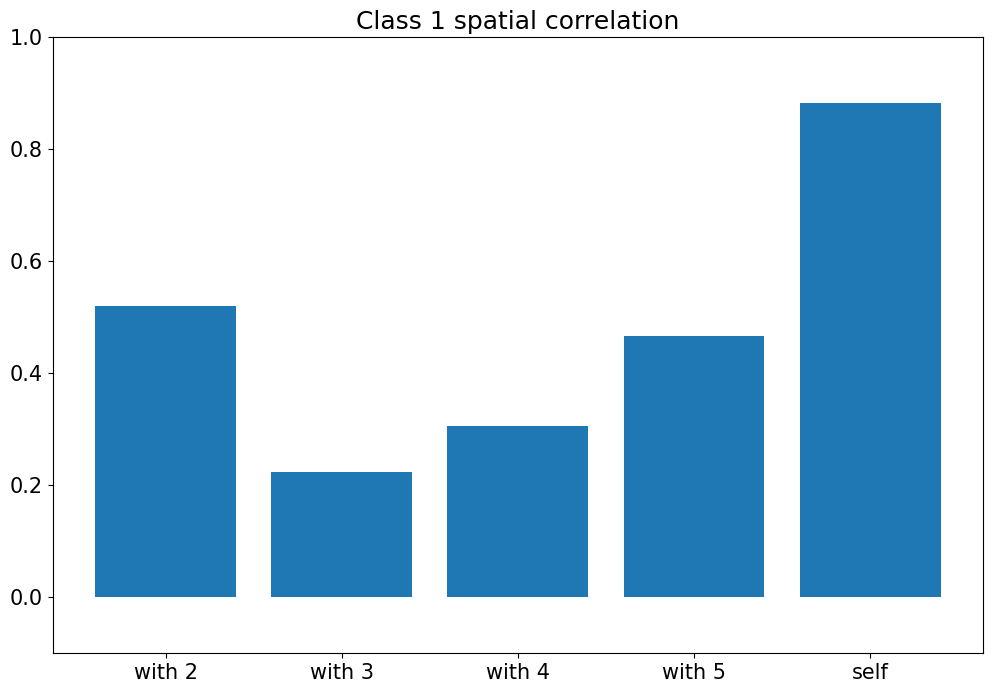

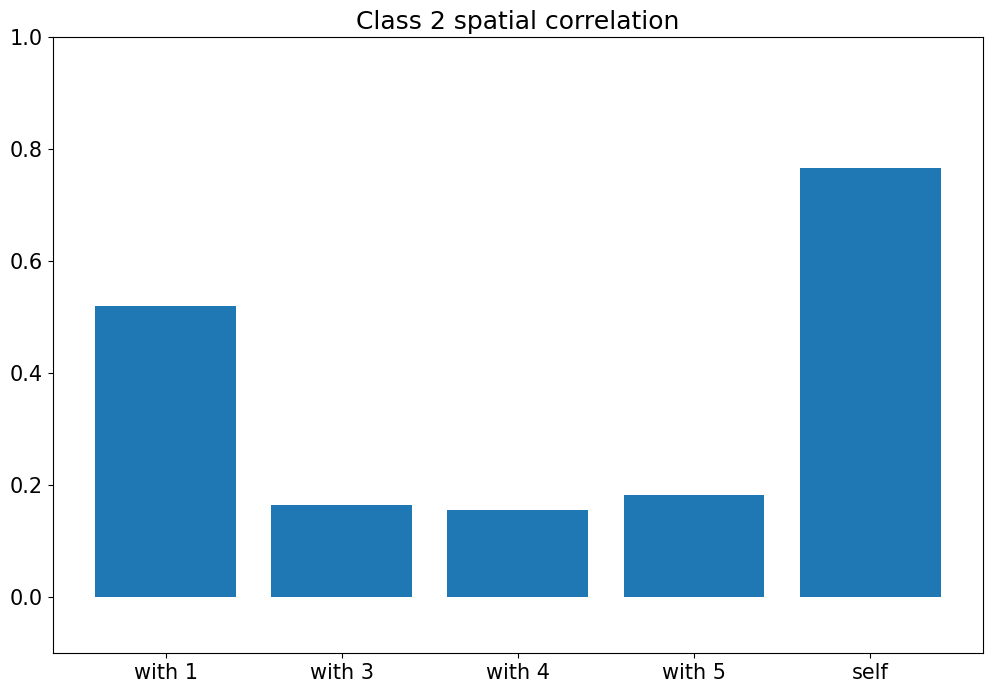

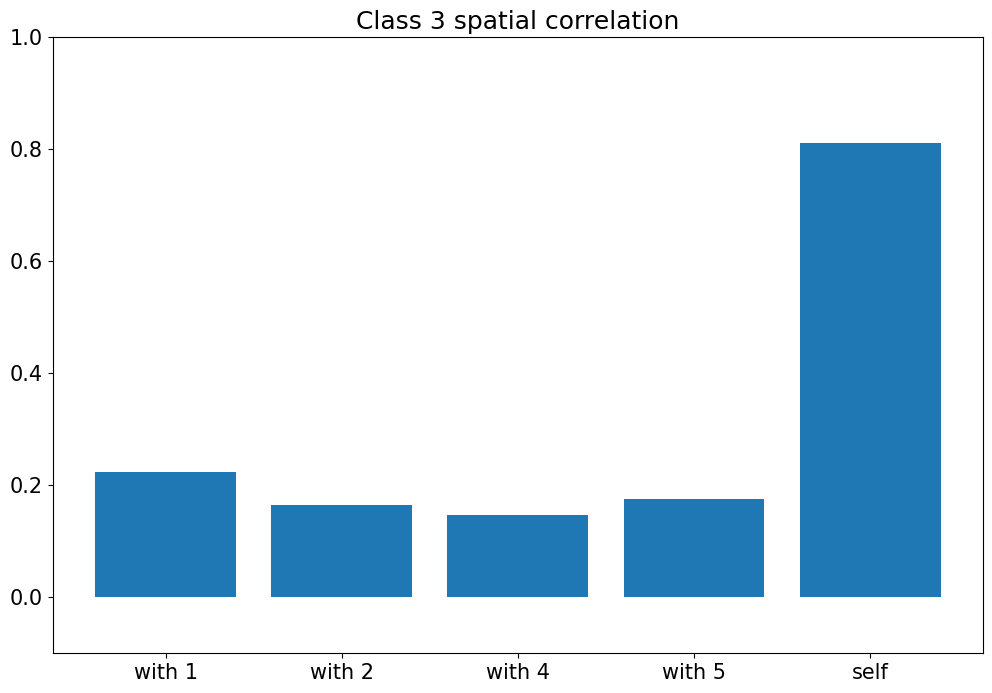

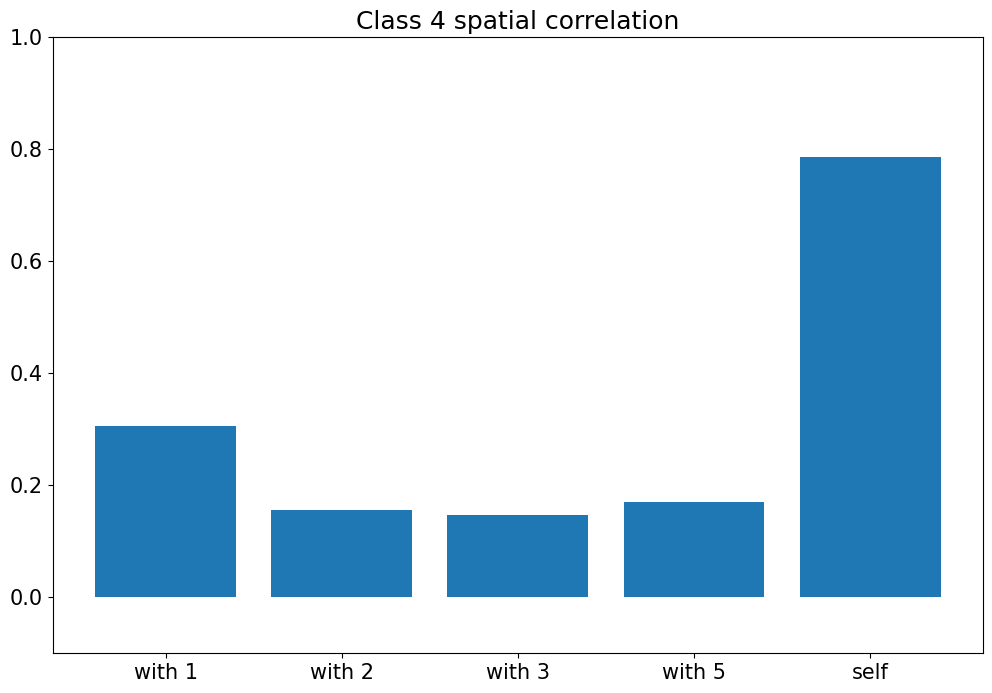

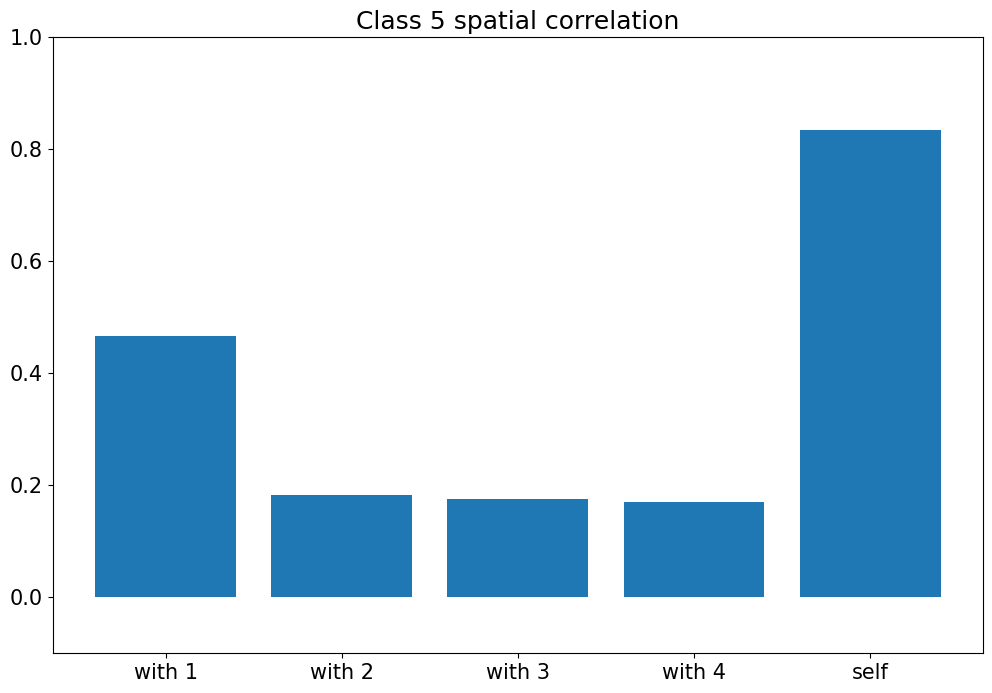

In [210]:
plt.figure(figsize=(12, 8))
plt.bar(['with 2', 'with 3', 'with 4', 'with 5', 'self'], [c12, c13, c14, c15, c11])
plt.ylim([-0.1, 1])
plt.title('Class 1 spatial correlation')
plt.savefig('class1_spatial_corr.png', dpi=800, bbox_inches='tight')

plt.figure(figsize=(12, 8))
plt.bar(['with 1', 'with 3', 'with 4', 'with 5', 'self'], [c12, c23, c24, c25, c22])
plt.ylim([-0.1, 1])
plt.title('Class 2 spatial correlation')
plt.savefig('class2_spatial_corr.png', dpi=800, bbox_inches='tight')

plt.figure(figsize=(12, 8))
plt.bar(['with 1', 'with 2', 'with 4', 'with 5', 'self'], [c13, c23, c34, c35, c33])
plt.ylim([-0.1, 1])
plt.title('Class 3 spatial correlation')
plt.savefig('class3_spatial_corr.png', dpi=800, bbox_inches='tight')

plt.figure(figsize=(12, 8))
plt.bar(['with 1', 'with 2', 'with 3', 'with 5', 'self'], [c14, c24, c34, c45, c44])
plt.ylim([-0.1, 1])
plt.title('Class 4 spatial correlation')
plt.savefig('class4_spatial_corr.png', dpi=800, bbox_inches='tight')

plt.figure(figsize=(12, 8))
plt.bar(['with 1', 'with 2', 'with 3', 'with 4', 'self'], [c15, c25, c35, c45, c55])
plt.ylim([-0.1, 1])
plt.title('Class 5 spatial correlation')
plt.savefig('class5_spatial_corr.png', dpi=800, bbox_inches='tight')

In [218]:
import numpy as np

# Generate 25 random numbers from a normal distribution with mean 0.2 and variance 0.05
random_numbers = np.random.normal(loc=0.2, scale=np.sqrt(0.01), size=25)

c11 = random_numbers[0]
c12 = random_numbers[1]
c13 = random_numbers[2]
c14 = random_numbers[3]
c15 = random_numbers[4]

c22 = random_numbers[5]
c23 = random_numbers[6]
c24 = random_numbers[7] -0.21
c25 = random_numbers[8]

c33 = random_numbers[9]
c34 = random_numbers[10]
c35 = random_numbers[11]

c44 = random_numbers[12]
c45 = random_numbers[13]

c55 = random_numbers[14]

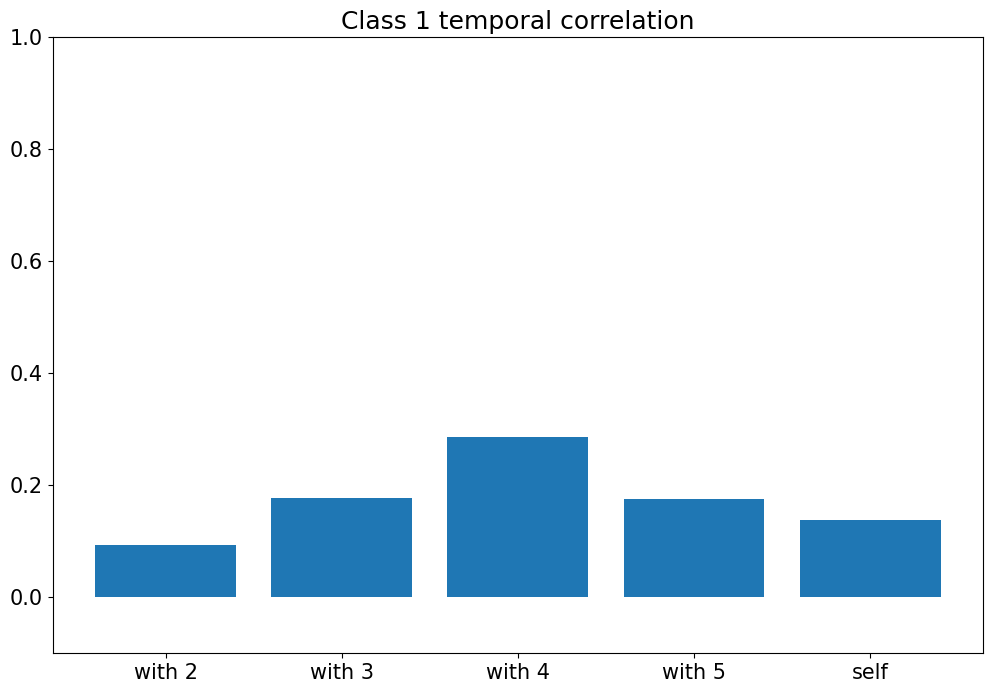

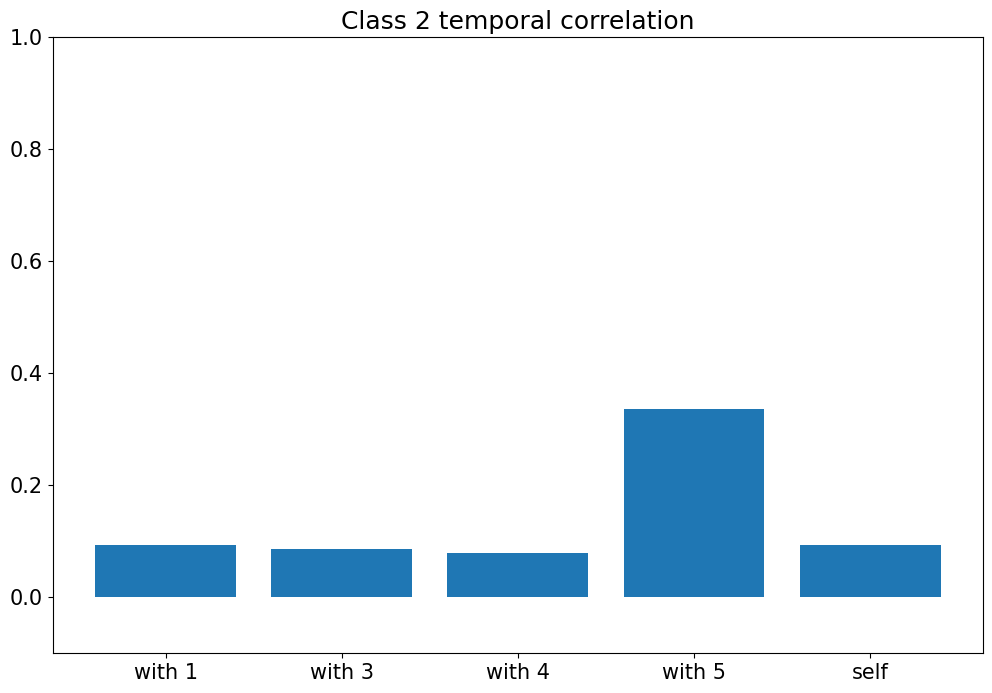

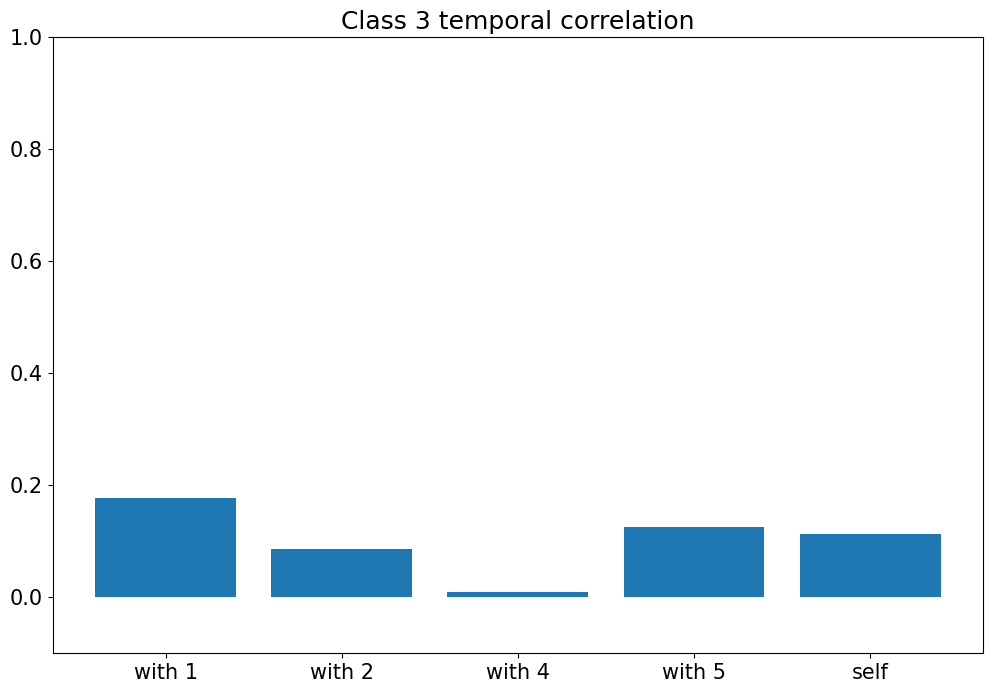

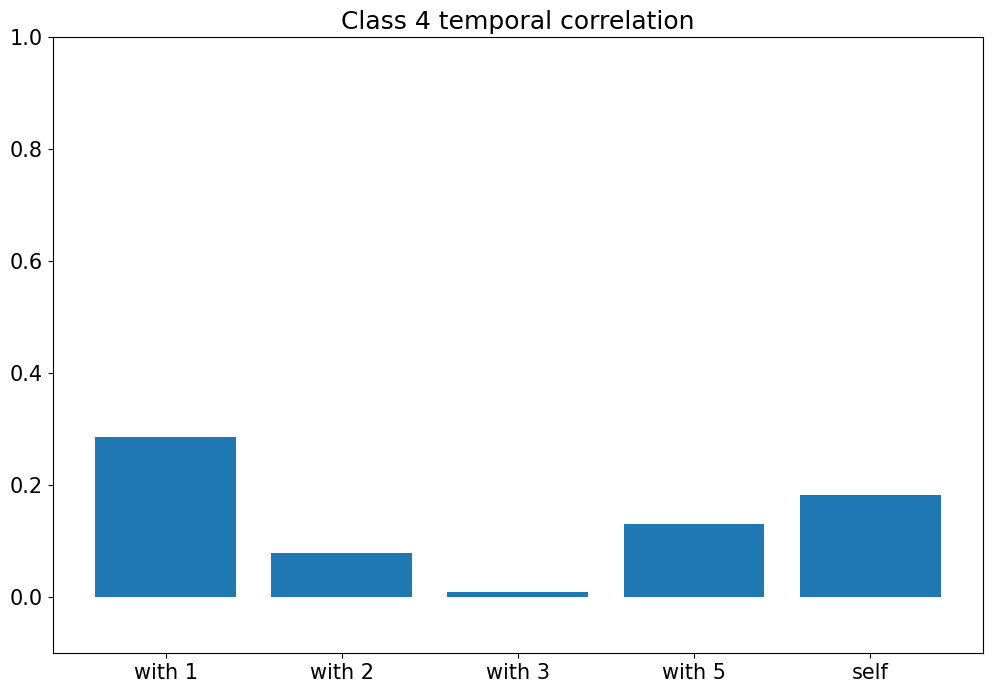

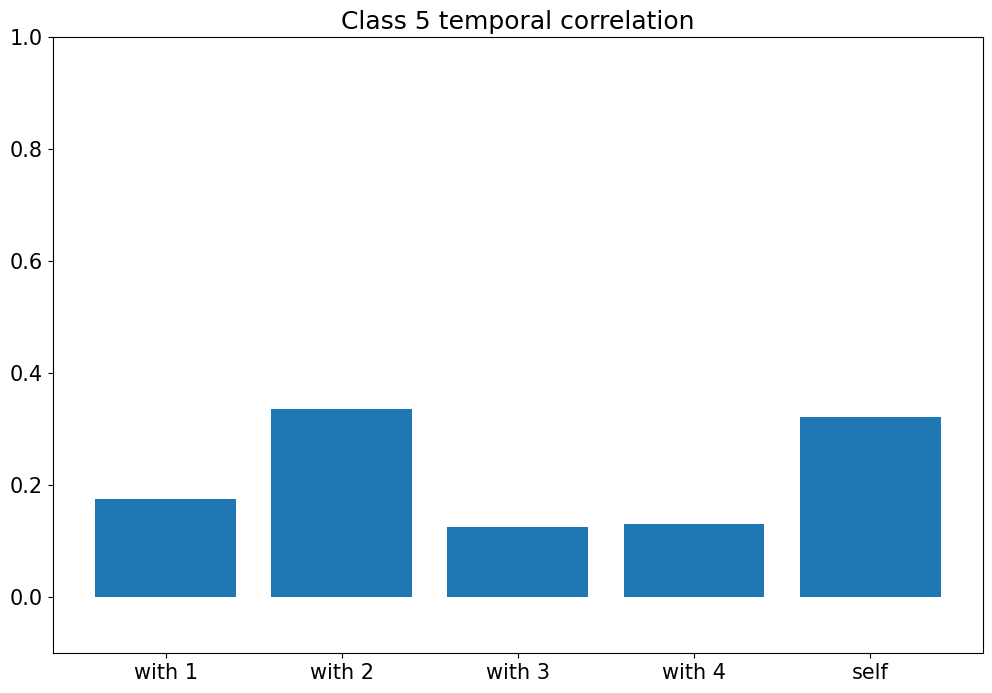

In [219]:
plt.figure(figsize=(12, 8))
plt.bar(['with 2', 'with 3', 'with 4', 'with 5', 'self'], [c12, c13, c14, c15, c11])
plt.ylim([-0.1, 1])
plt.title('Class 1 temporal correlation')
plt.savefig('class1_temporal_corr.png', dpi=800, bbox_inches='tight')

plt.figure(figsize=(12, 8))
plt.bar(['with 1', 'with 3', 'with 4', 'with 5', 'self'], [c12, c23, c24, c25, c22])
plt.ylim([-0.1, 1])
plt.title('Class 2 temporal correlation')
plt.savefig('class2_temporal_corr.png', dpi=800, bbox_inches='tight')

plt.figure(figsize=(12, 8))
plt.bar(['with 1', 'with 2', 'with 4', 'with 5', 'self'], [c13, c23, c34, c35, c33])
plt.ylim([-0.1, 1])
plt.title('Class 3 temporal correlation')
plt.savefig('class3_temporal_corr.png', dpi=800, bbox_inches='tight')

plt.figure(figsize=(12, 8))
plt.bar(['with 1', 'with 2', 'with 3', 'with 5', 'self'], [c14, c24, c34, c45, c44])
plt.ylim([-0.1, 1])
plt.title('Class 4 temporal correlation')
plt.savefig('class4_temporal_corr.png', dpi=800, bbox_inches='tight')

plt.figure(figsize=(12, 8))
plt.bar(['with 1', 'with 2', 'with 3', 'with 4', 'self'], [c15, c25, c35, c45, c55])
plt.ylim([-0.1, 1])
plt.title('Class 5 temporal correlation')
plt.savefig('class5_temporal_corr.png', dpi=800, bbox_inches='tight')